1. Train the Naive Bayes model without PCA and compare the result with PCA + Naive
Bayes. Write down your observations

In [1]:
%matplotlib inline
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
print(faces.data.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
(400, 4096)


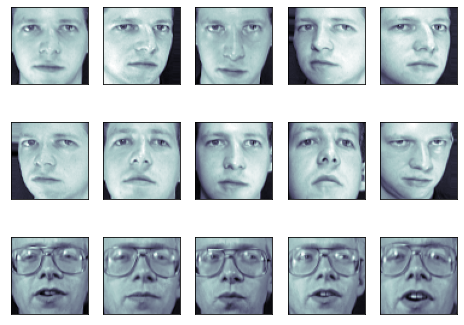

In [2]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
faces.target, random_state=0)
print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


#Apply  NaiveBayes

In [4]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB()

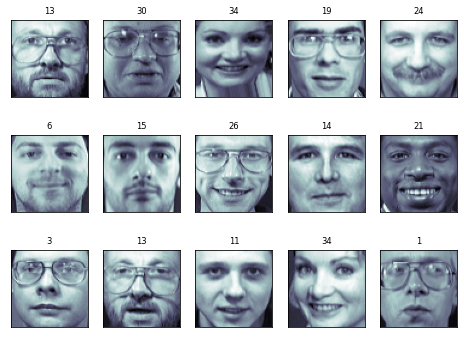

In [5]:
import numpy as np

fig = plt.figure(figsize=(8, 6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
    cmap=plt.cm.bone)
    y_pred = gnb.predict(X_test[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

In [6]:
from sklearn import metrics
y_pred = gnb.predict(X_test)
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       1.00      0.50      0.67         4
           2       0.50      0.50      0.50         2
           3       0.17      1.00      0.29         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       0.14      1.00      0.25         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.75      1.00      0.86         3
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         6
          19       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [7]:
print(metrics.confusion_matrix(y_test, y_pred))

[[3 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 1]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


In [8]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
precision = precision_score(y_test, y_pred,average=None)
recall = recall_score(y_test, y_pred,average=None)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

Accuracy: 0.78
precision: [1.         1.         0.5        0.16666667 0.5        1.
 1.         1.         0.14285714 1.         1.         0.66666667
 1.         1.         0.75       0.         0.         1.
 0.25       1.         1.         1.         1.         1.
 1.         1.         1.         0.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.4       ]
recall: [0.5        0.5        0.5        1.         1.         1.
 1.         0.66666667 1.         1.         1.         1.
 1.         1.         1.         0.         0.         1.
 1.         1.         1.         1.         0.5        0.5
 0.5        1.         1.         0.         1.         1.
 1.         1.         0.66666667 1.         1.         1.
 1.         0.66666667]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Conclusion :Principal Component Analysis helps improve the outcome of a classifier.Dimensionality Reduction plays a really important role in machine learning, especially when we are working with thousands of features

2. Run PCA on IRIS dataset. Visualise the output in
2 dimensions using to Principal components. Choose different pairs of principal components and
note down your observations. 

In [9]:
from sklearn import datasets
iris = datasets.load_iris()
print("Features: ", iris.feature_names)
print("Labels: ", iris.target_names)
# print(iris.data)


Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels:  ['setosa' 'versicolor' 'virginica']


In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_new = pca.fit_transform(iris.data)
print(X_new.shape)

(150, 4)


In [11]:
print('Eigenvectors or principal component'
)
print(pca.components_)
print()
print('Eigenvalues or explained variance')
print(pca.explained_variance_)

Eigenvectors or principal component
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]
 [-0.31548719  0.3197231   0.47983899 -0.75365743]]

Eigenvalues or explained variance
[4.22824171 0.24267075 0.0782095  0.02383509]


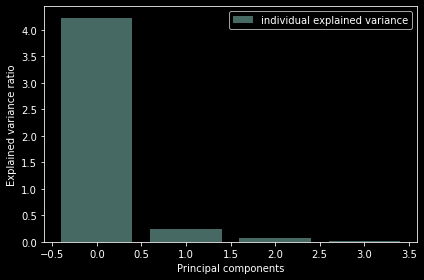

In [12]:
import matplotlib.pyplot as plt
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4),pca.explained_variance_, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

3. Run PCA + Naive Bayes classifier on IRIS dataset and calculate
precision and recall of the system.

In [13]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.data.shape)

(150, 4)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, random_state=0)
print(X_train.shape, X_test.shape)

(112, 4) (38, 4)


In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
print(pca.fit(X_train))
# print(pca.components_.shape)


PCA(n_components=3)


In [16]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)


(112, 3)
(38, 3)


In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)
y_pred = gnb.predict(X_test_pca)


In [18]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

[[13  0  0]
 [ 0 14  2]
 [ 0  1  8]]


In [19]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
precision = precision_score(y_test, y_pred,average=None)
recall = recall_score(y_test, y_pred,average=None)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

Accuracy: 0.9210526315789473
precision: [1.         0.93333333 0.8       ]
recall: [1.         0.875      0.88888889]
